In [1]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import scipy.io

plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size' : 18})

# Load images to matrix
face_images = []
size = (128, 128)
count_person = 0
count_image = 0
person_index = {}

data_path = os.getcwd()+'/new_dataset/preprocessed/train'
for name in os.listdir(data_path):
    folder_name = data_path + '/' + name
    count_person += 1
    person_index[name] = (count_person, count_image)
    for img_name in os.listdir(folder_name):
        img_path = folder_name + '/' + img_name
        image = cv2.imread(img_path, 0)
        face_images.append(image)
        count_image += 1
        

face_images = np.array(face_images)

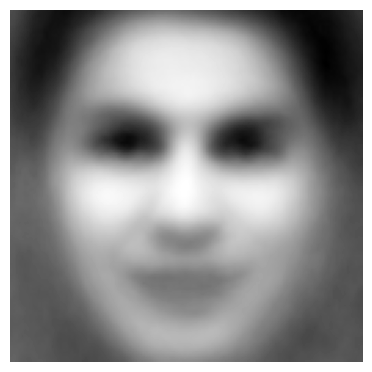

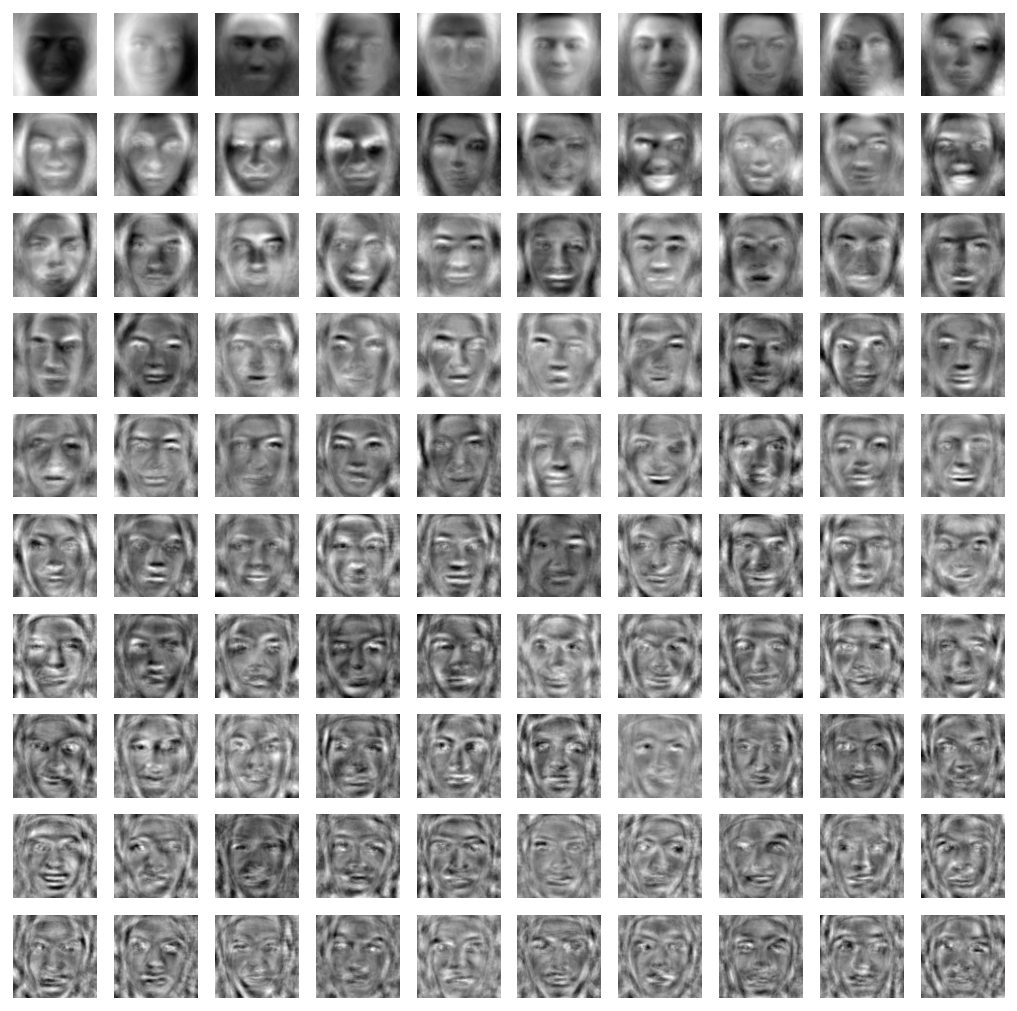

In [2]:
# SVD/PCA, eigen faces

#đưa ảnh về vector
face_images_reshape = np.reshape(face_images, (len(face_images), 128*128))
face_images_reshape = face_images_reshape.T

avg_face = np.mean(face_images_reshape, axis=1)
#biến đổi SVD
U, S, VT = np.linalg.svd(face_images_reshape, full_matrices=False)


fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avg_face,size))
img_avg.set_cmap('gray')
plt.axis('off')

#xem các eigen faces
rows = 10
columns = 10
fig = plt.figure(figsize=(10, 10), dpi=128)

for i in range(1, 101):
    plt.axis('off')
    # plt.title(str(i+1))
    # plt.imshow(np.reshape(U[:,i],size), cmap='gray')
    fig.add_subplot(rows, columns, i)
    plt.imshow(np.reshape(U[:,i],size), cmap='gray')

plt.axis('off')
plt.show()

# w = 10
# h = 10
# fig = plt.figure(figsize=(8, 8))
# columns = 4
# rows = 5
# for i in range(1, columns*rows +1):
#     img = np.random.randint(10, size=(h,w))
#     fig.add_subplot(rows, columns, i)
#     plt.imshow(img)
# plt.show()

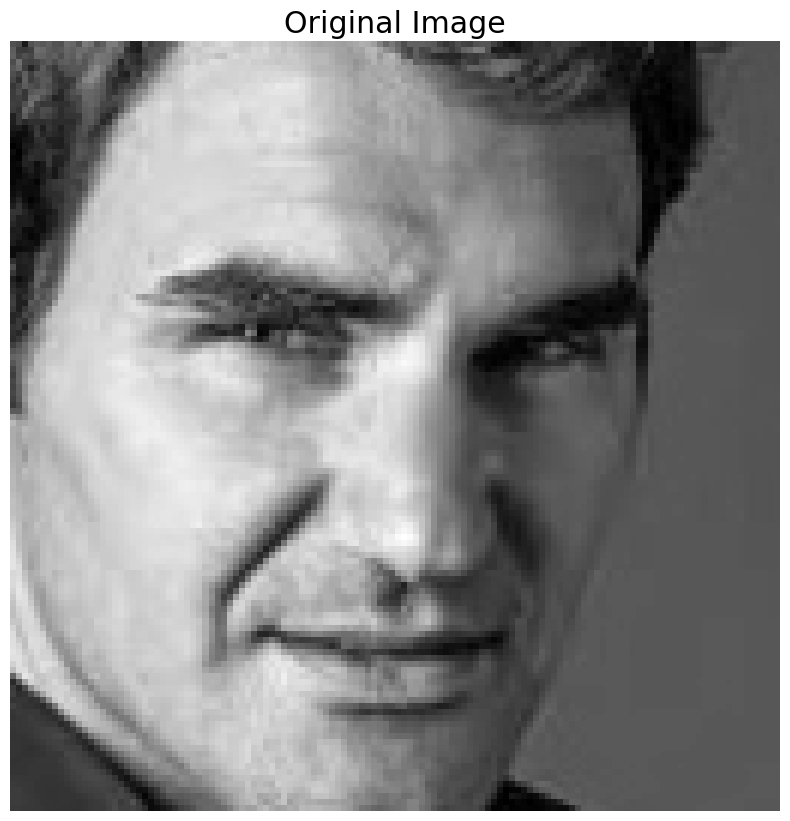

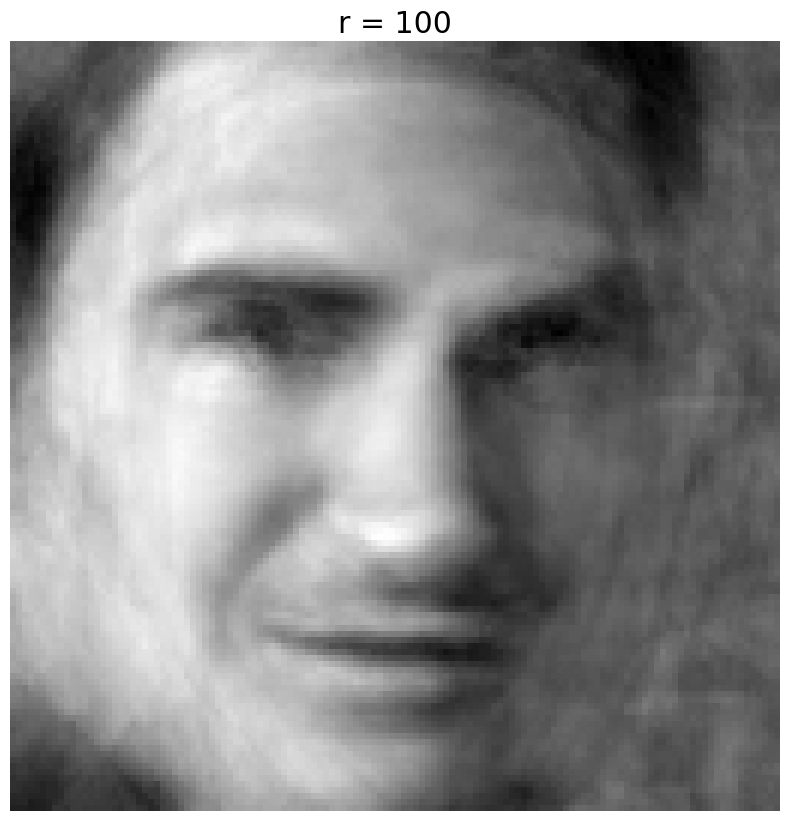

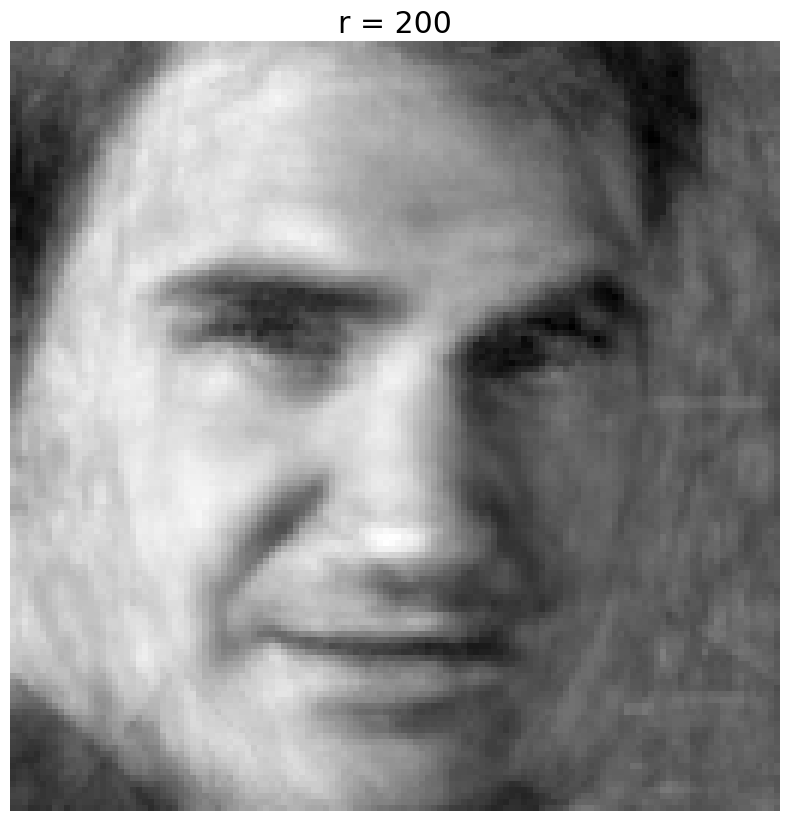

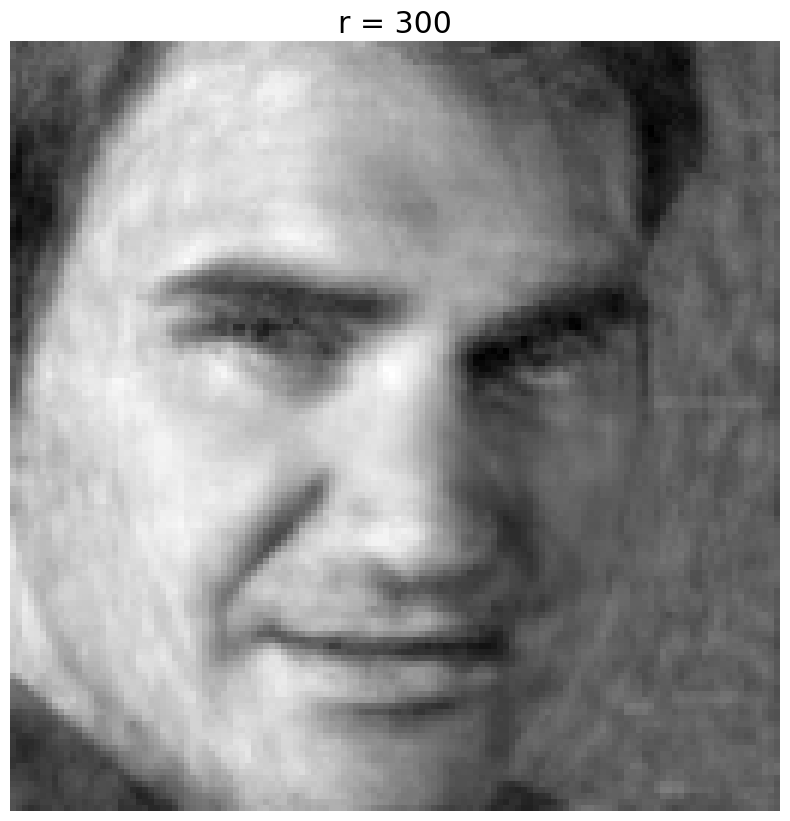

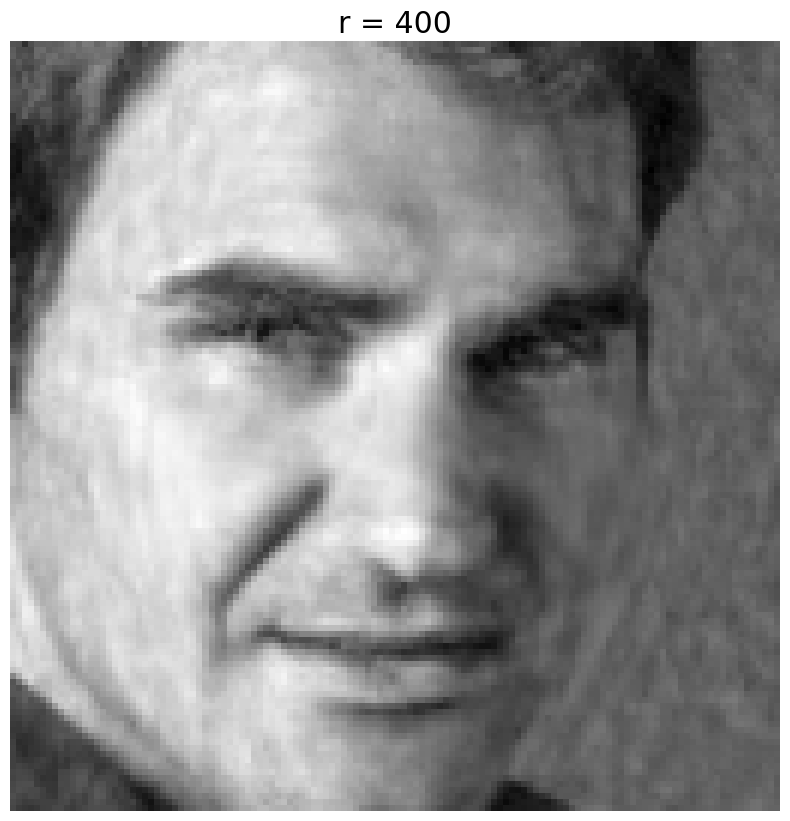

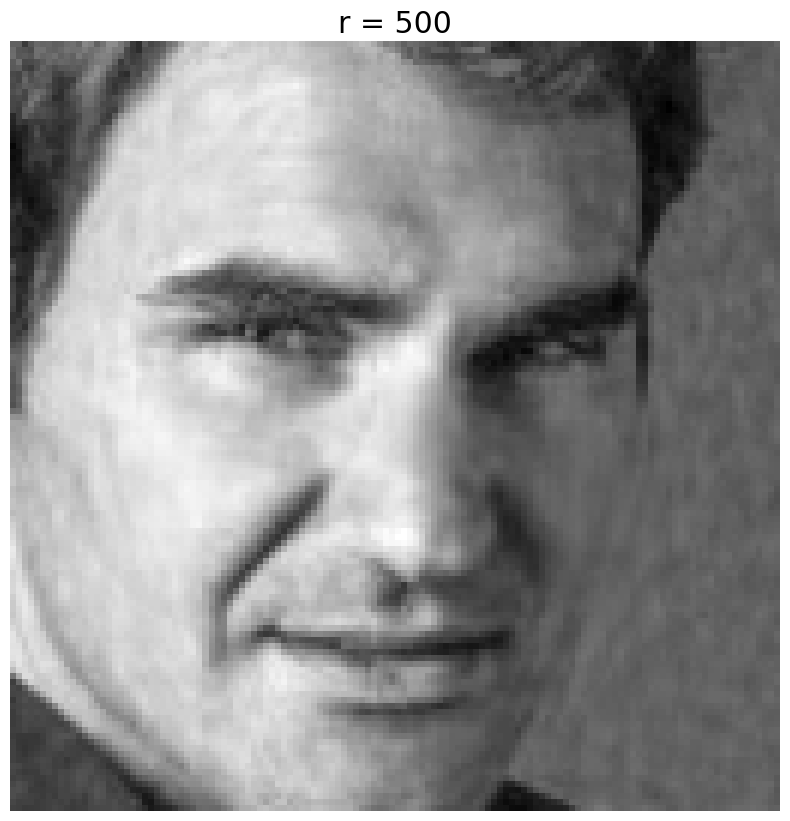

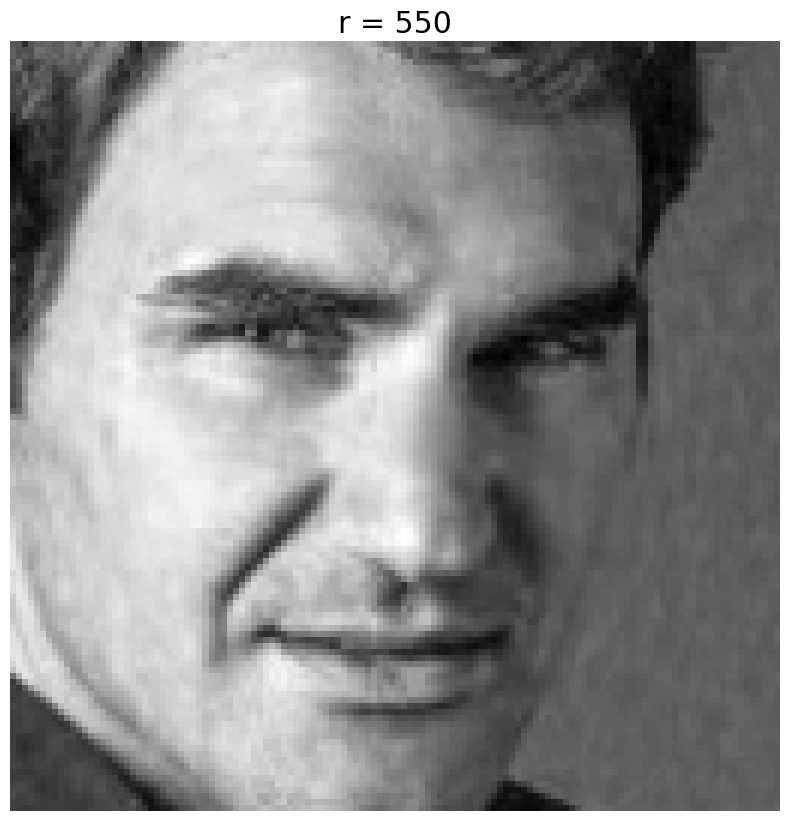

In [4]:
# Xấp xỉ một khuôn mặt sử dụng eigen face

# Xấp xỉ mặt trong tập test
# test_image_path = os.getcwd()+'/new_dataset/preprocessed/test/'+'roger_federer/'+'206.jpg'
# test_face = cv2.imread(test_image_path, 0)

# Xấp xỉ mặt trong tập train
test_image_path = os.getcwd()+'/new_dataset/preprocessed/train/'+'roger_federer/'+'1.jpg'
test_face = cv2.imread(test_image_path, 0)


# Other face
# test_face = cv2.resize(cv2.imread('./result_images/420.jpg', 0), size)

test_face.resize(128*128)

plt.imshow(np.reshape(test_face,size))
plt.set_cmap('gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

test_face_mean_subtract = test_face - avg_face
r_list = [100, 200, 300, 400, 500, 550]

for r in r_list:
    reconFace = avg_face + U[:,:r]  @ U[:,:r].T @ test_face_mean_subtract
    img = plt.imshow(np.reshape(reconFace,size))
    img.set_cmap('gray')
    plt.title('r = ' + str(r))
    plt.axis('off')
    plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_20228\972243411.py:5: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim((0, 10**6))


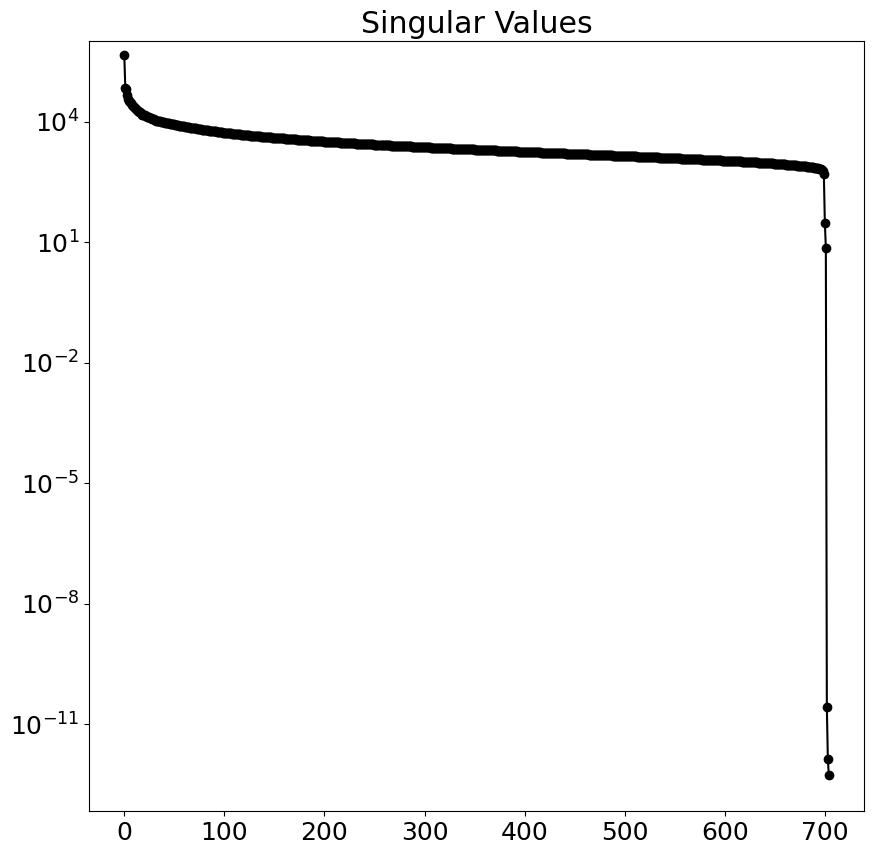

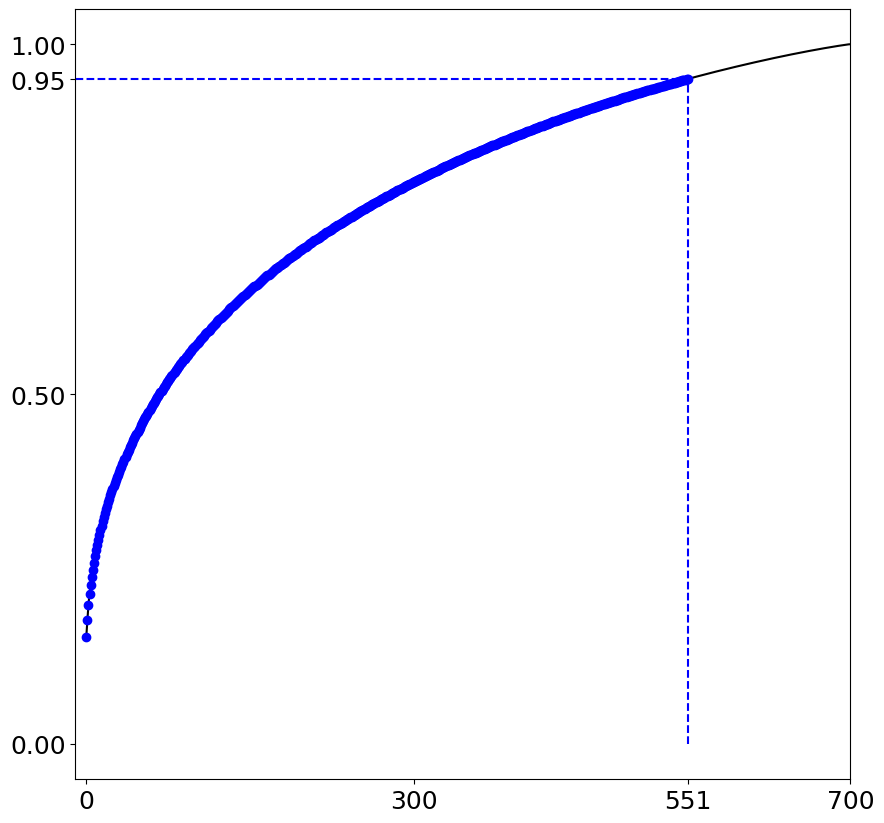

In [5]:
#vẽ các singular values
plt.figure()
plt.semilogy(S, '-o', color='k')
plt.title('Singular Values')
plt.ylim((0, 10**6))
plt.show()

# plt.figure()
# # plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)), '-o', color='k')
# plt.plot(np.cumsum(S)/np.sum(S))
# plt.title('Singular Values: Cumulative Sum')


# 95% thông tin
cdS = np.cumsum(S) / np.sum(S) # Cumulative energy
r95 = np.min(np.where(cdS > 0.95))

fig3,ax3 = plt.subplots(1)
ax3.plot(cdS,color='k')
ax3.plot(cdS[:(r95+1)],'o',color='b')
# ax3.plot(cdS[:(r+1)],'o',color='r')
plt.xticks(np.array([0, 300, r95, 700]))
plt.yticks(np.array([0, 0.5, 0.95, 1]))
plt.xlim((-10,700))
ax3.plot(np.array([r95, r95, -10]),np.array([0, 0.95, 0.95]),'--',color='b')


plt.show()

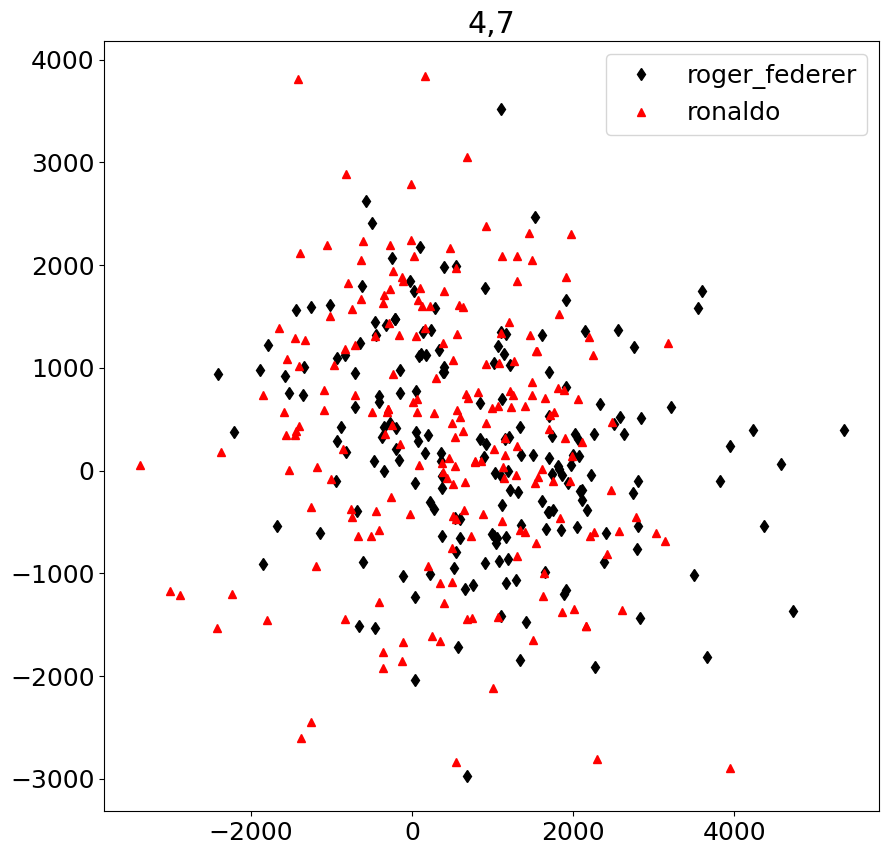

In [6]:
#Chiếu person1 và person2 lên thành phần chính i và j (eigen faces i và j)

person1 = 'roger_federer'
person2 = 'ronaldo'

person1_first_col = person_index[person1][1]
person2_first_col = person_index[person2][1]

person1_last_col = -1
person2_last_col = -1

for p in person_index:
    if person_index[p][0] == person_index[person1][0]+1:
        person1_last_col = person_index[p][1]-1
    if person_index[p][0] == person_index[person2][0]+1:
        person2_last_col = person_index[p][1]-1
if person_index[person1][0] == count_person:
    person1_last_col = count_image-1
if person_index[person2][0] == count_person:
    person2_last_col = count_image-1

person1_faces = face_images_reshape[:, person1_first_col:person1_last_col]
person2_faces = face_images_reshape[:, person2_first_col:person2_last_col]

# Plot 2D points represent faces after projected onto PCi and PCj
# vẽ các điểm 2D tượng trưng cho khuôn mặt sau khi chiếu lên PCi và PCj
i = 4
j = 7
PCA_modes = [i, j]
PCA_coords_person1 = U[:,PCA_modes-np.ones_like(PCA_modes)].T @ person1_faces
PCA_coords_person2 = U[:,PCA_modes-np.ones_like(PCA_modes)].T @ person2_faces

plt.plot(PCA_coords_person1[0,:],PCA_coords_person1[1,:],'d',color='k',label=person1)
plt.plot(PCA_coords_person2[0,:],PCA_coords_person2[1,:],'^',color='r',label=person2)
plt.title(str(i) + ',' + str(j))
plt.legend()
plt.show()

